Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


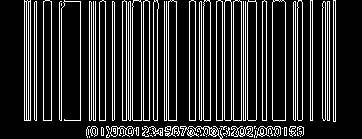

Detected Barcodes:
Type: DATABAR_EXP, Data: 01900123456789083202000156


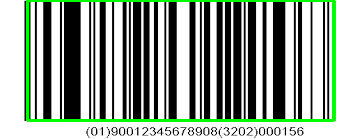

In [ ]:
!pip install pyzbar
!apt-get install libzbar0

import cv2
import numpy as np
from pyzbar.pyzbar import decode
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/barcode2.jpg')
if image is None:
    print("Error: Image not found.")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 240)
cv2_imshow(edges)

orb = cv2.ORB_create(nfeatures=500)
keypoints, descriptors = orb.detectAndCompute(edges, None)

keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

decoded_objects = decode(image)

if not decoded_objects:
    print("No barcodes detected.")
else:
    print("Detected Barcodes:")
    for obj in decoded_objects:
        (x, y, w, h) = obj.rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        barcode_data = obj.data.decode("utf-8")
        barcode_type = obj.type
        text = f"{barcode_type}: {barcode_data}"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        print(f"Type: {barcode_type}, Data: {barcode_data}")

cv2_imshow(image)